# Data Pre-Processing and Analytics (Part 1)
This notebook demonstrates basic methods of data pre-processing and analytics.

In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import requests

load_dotenv()
api_key = os.getenv('fmp_api_key')

url_base = "https://financialmodelingprep.com/stable/"

# fetch s&p 500 constituents
constituents = requests.get(url=f"{url_base}sp500-constituent", params={'apikey': api_key}).json()
df_constituents = pd.DataFrame(constituents)
df_constituents.head()

,symbol,name,sector,subSector,headQuarter,dateFirstAdded,cik,founded
0,IBKR,Interactive Brokers Group,Financial Services,Investment - Banking & Investment Services,"Greenwich, CT",2025-08-28,0001381197,1982
1,XYZ,"Block, Inc.",Technology,Software - Infrastructure,"Oakland, California",2025-07-23,0001512673,2009
2,TTD,"The Trade Desk, Inc.",Technology,Software - Application,"Ventura, California",2025-07-18,0001671933,2009
3,DDOG,Datadog,Technology,Software - Application,"New York City, New York",2025-07-09,0001561550,2010
4,COIN,Coinbase Global,Financial Services,Financial - Data & Stock Exchanges,"Wilmington, Delaware",2025-05-19,0001679788,2012


In [2]:
df_constituents['sector'].value_counts()

sector
Technology                80
Industrials               73
Financial Services        69
Healthcare                60
Consumer Cyclical         55
Consumer Defensive        37
Utilities                 32
Real Estate               31
Energy                    24
Communication Services    22
Basic Materials           20
Name: count, dtype: int64

In [3]:
len(df_constituents)

503

In [4]:
df_constituents['dateFirstAdded'] = pd.to_datetime(df_constituents['dateFirstAdded'])
df_constituents['yearAdded'] = df_constituents['dateFirstAdded'].dt.year
df_constituents['yearAdded'].value_counts().sort_index()

yearAdded
1957    53
1964     1
1965     2
1969     2
1970     2
1972     2
1973     2
1974     1
1975     2
1976    11
1978     1
1979     1
1980     3
1981     3
1982     5
1983     3
1984     4
1985     7
1986     3
1987     2
1988     4
1989     5
1991     1
1992     3
1993     3
1994     7
1995     7
1996     2
1997    14
1998    11
1999     9
2000     9
2001     8
2002    13
2003     5
2004     6
2005     7
2006     9
2007    12
2008    17
2009    12
2010     9
2011    10
2012    14
2013    10
2014     8
2015    14
2016    23
2017    22
2018    14
2019    22
2020    12
2021    15
2022    16
2023    15
2024    16
2025     9
Name: count, dtype: int64

In [6]:
df_constituents['headQuarterState'] = df_constituents['headQuarter'].str.split(',').str[1].str.strip()
df_constituents['headQuarterState'].value_counts()

headQuarterState
California              69
New York                53
Texas                   47
Illinois                31
Massachusetts           23
Ohio                    20
Georgia                 17
Florida                 17
Pennsylvania            16
Minnesota               15
Virginia                15
Connecticut             14
New Jersey              14
North Carolina          12
Washington              12
Ireland                 11
Arizona                 10
Michigan                 8
Indiana                  8
Tennessee                8
Missouri                 7
Colorado                 7
Wisconsin                7
Maryland                 7
Oklahoma                 4
Rhode Island             4
Nevada                   4
Arkansas                 3
Kentucky                 3
Delaware                 3
United Kingdom           3
D.C.                     2
Netherlands              2
Bermuda                  2
Louisiana                2
Alabama                  2
Nebraska   

In [7]:
states = {
    "NY": "New York",
    "CA": "California",
    "CT": "Connecticut",
    "OK": "Oklahoma",
    "D.C.": "District of Columbia",
    "Ohio; Detroit": "Ohio",
    "Illinois; Pittsburgh": "Illinois",
    "UK": "United Kingdom"
}    

df_constituents['headQuarterState'] = df_constituents['headQuarterState'].replace(states)
df_constituents['headQuarterState'].value_counts()

headQuarterState
California              71
New York                54
Texas                   47
Illinois                32
Massachusetts           23
Ohio                    21
Georgia                 17
Florida                 17
Pennsylvania            16
Connecticut             15
Virginia                15
Minnesota               15
New Jersey              14
North Carolina          12
Washington              12
Ireland                 11
Arizona                 10
Tennessee                8
Michigan                 8
Indiana                  8
Missouri                 7
Colorado                 7
Maryland                 7
Wisconsin                7
Oklahoma                 5
United Kingdom           4
Rhode Island             4
Nevada                   4
Kentucky                 3
Delaware                 3
Arkansas                 3
Louisiana                2
Switzerland              2
District of Columbia     2
Alabama                  2
Idaho                    2
Bermuda    

In [8]:
df_constituents = df_constituents.drop(columns=['founded','dateFirstAdded', 'cik', 'headQuarter'])
df_constituents = df_constituents.rename(columns={
    'symbol': 'ticker',
    'subSector': 'subsector',
    'yearAdded': 'year_added',
    'headQuarterState': 'headquarter_state'
})
df_constituents.head()

,ticker,name,sector,subsector,year_added,headquarter_state
0,IBKR,Interactive Brokers Group,Financial Services,Investment - Banking & Investment Services,2025,Connecticut
1,XYZ,"Block, Inc.",Technology,Software - Infrastructure,2025,California
2,TTD,"The Trade Desk, Inc.",Technology,Software - Application,2025,California
3,DDOG,Datadog,Technology,Software - Application,2025,New York
4,COIN,Coinbase Global,Financial Services,Financial - Data & Stock Exchanges,2025,Delaware


In [11]:
df_constituents.to_csv("data/sp500_constituents.csv", index=False)

In [51]:
common_states = df_constituents['headquarter_state'].value_counts().head(5).index
common_states_decade_counts = (
    df_constituents[df_constituents['headquarter_state'].isin(common_states)]
    .assign(decade=(df_constituents['year_added']//10)*10)
    .pivot_table(index="headquarter_state", columns="decade", values="ticker", aggfunc="count", fill_value=0)
)
common_states_decade_counts.head()

decade,1950,1960,1970,1980,1990,2000,2010,2020
headquarter_state,,,,,,,,
California,2,1,4,2,8,14,25,15
Illinois,5,0,3,5,2,4,12,1
Massachusetts,1,0,0,2,2,8,2,8
New York,7,0,3,4,9,12,12,7
Texas,7,0,0,5,5,8,10,12


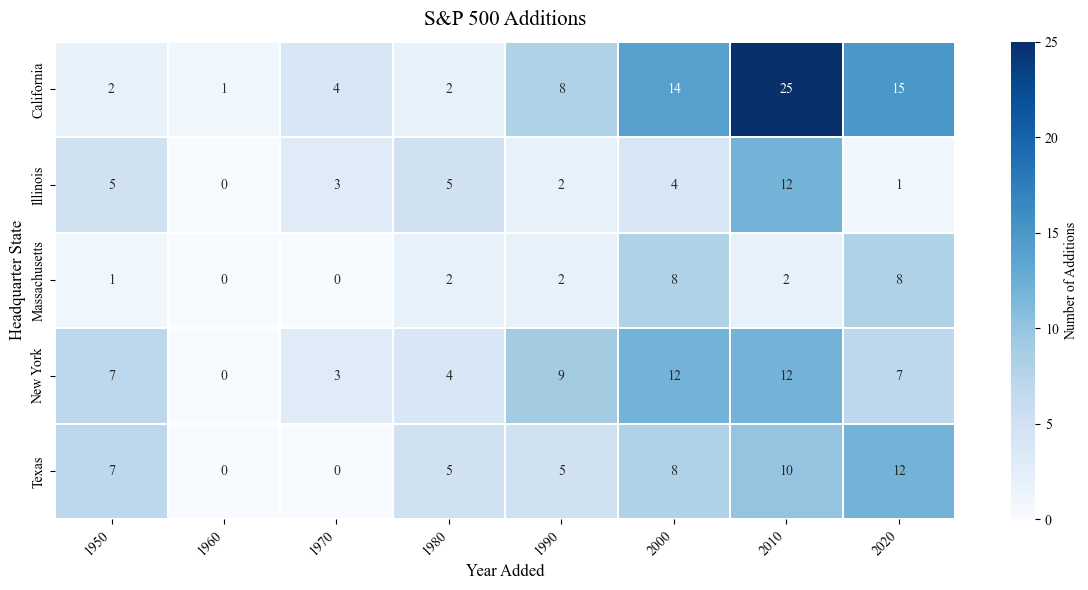

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(12,6))
sns.heatmap(common_states_decade_counts, cmap="Blues", annot=True, linewidths=0.1, cbar_kws={'label': 'Number of Additions'})
plt.title("S&P 500 Additions", fontsize=15, pad=12)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Headquarter State", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [54]:
common_sectors = df_constituents['sector'].value_counts().head(5).index
common_states_sector_counts = (
    df_constituents[df_constituents['headquarter_state'].isin(common_states) & df_constituents['sector'].isin(common_sectors)]
    .pivot_table(index="headquarter_state", columns="sector", values="ticker", aggfunc="count", fill_value=0)
)
common_states_sector_pct = common_states_sector_counts.div(common_states_sector_counts.sum(axis=1), axis=0) * 100
common_states_sector_pct

sector,Consumer Cyclical,Financial Services,Healthcare,Industrials,Technology
headquarter_state,,,,,
California,11.764706,7.843137,17.647059,0.000000,62.745098
Illinois,18.181818,22.727273,18.181818,27.272727,13.636364
Massachusetts,5.555556,5.555556,55.555556,11.111111,22.222222
New York,5.714286,62.857143,11.428571,5.714286,14.285714
Texas,15.789474,10.526316,5.263158,36.842105,31.578947


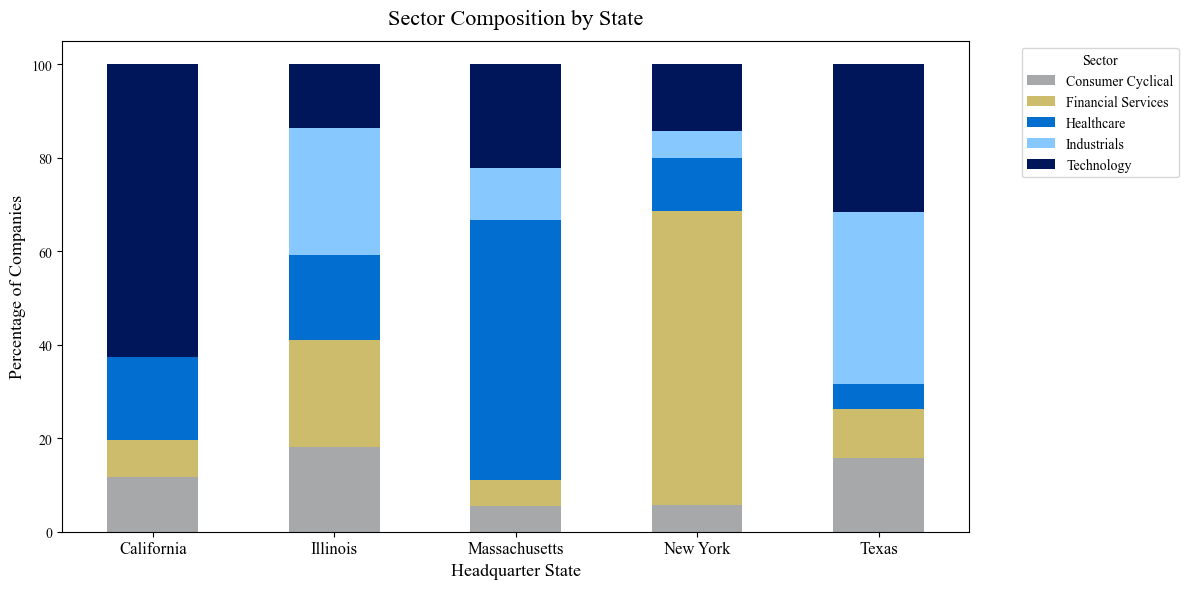

In [94]:
custom_colors = ['#a7a8aa', '#cdbc6c', '#026fd0', '#87c8ff', '#00165b']

plt.figure(figsize=(12,6))
common_states_sector_pct.plot(
    kind="bar",
    stacked=True,
    color=custom_colors,
    ax=plt.gca()
)

plt.title("Sector Composition by State", fontsize=16, pad=12)
plt.xlabel("Headquarter State", fontsize=13)
plt.ylabel("Percentage of Companies", fontsize=13)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

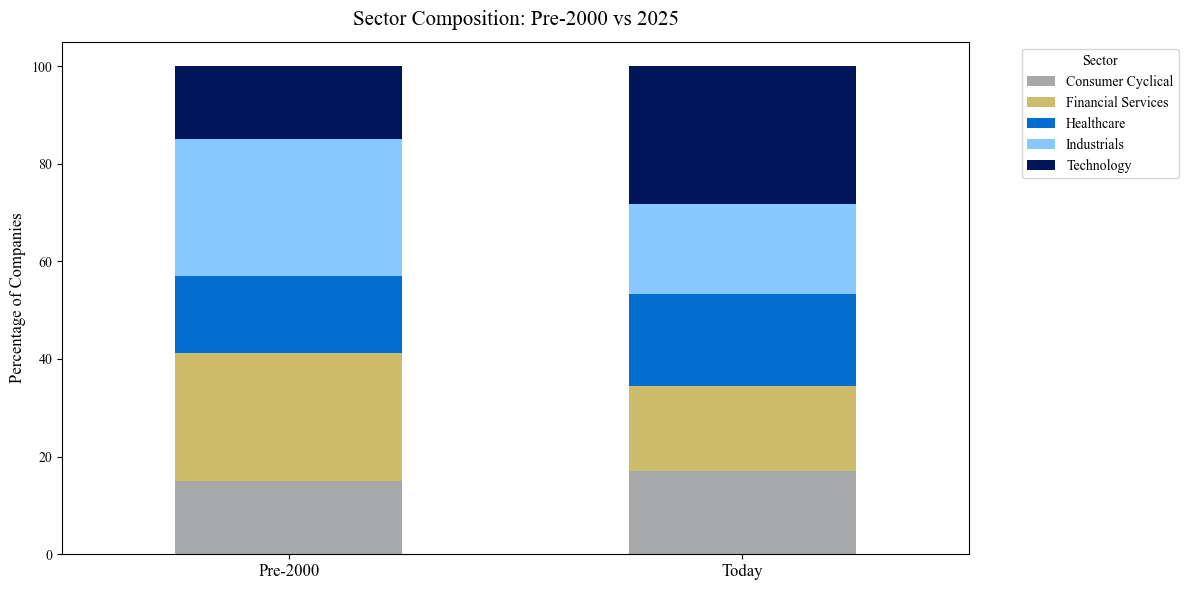

In [106]:
df_common_sectors = df_constituents[df_constituents['sector'].isin(common_sectors)].copy()
df_common_sectors['period'] = np.where(df_common_sectors['year_added'] < 2000, 'Pre-2000', 'Today')

sector_period_counts = df_common_sectors.pivot_table(
    index='sector', columns='period', values='ticker', aggfunc='count', fill_value=0
)
sector_period_pct = sector_period_counts.div(sector_period_counts.sum(axis=0), axis=1) * 100
sector_period_pct = sector_period_pct[['Pre-2000', 'Today']]

plt.figure(figsize=(12, 6))
ax = sector_period_pct.T.plot(
    kind="bar",
    stacked=True,
    color=custom_colors,
    ax=plt.gca()
)

plt.title("Sector Composition: Pre-2000 vs 2025", fontsize=15, pad=12)
plt.xlabel("")
plt.ylabel("Percentage of Companies", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [108]:
ENDPOINTS = [
    {
        "name": "income_statement",
        "url": f"{url_base}income-statement",
        "params": {"period": "annual", "limit": 100}
    },
    {
        "name": "balance_sheet",
        "url": f"{url_base}balance-sheet-statement",
        "params": {"period": "annual", "limit": 100}
    },
    {
        "name": "cashflow_statement",
        "url": f"{url_base}cash-flow-statement",
        "params": {"period": "annual", "limit": 100}
    },
    {
        "name": "financial_metrics",
        "url": f"{url_base}key-metrics",
        "params": {"period": "annual", "limit": 100}
    },
    {
        "name": "financial_ratios",
        "url": f"{url_base}ratios",
        "params": {"period": "annual", "limit": 100}
    },
    {
        "name": "income_statement_growth",
        "url": f"{url_base}income-statement-growth",
        "params": {"period": "annual", "limit": 100}
    },
    {
        "name": "balance_sheet_growth",
        "url": f"{url_base}balance-sheet-statement-growth",
        "params": {"period": "annual", "limit": 100}
    },
    {
        "name": "cashflow_statement_growth",
        "url": f"{url_base}cash-flow-statement-growth",
        "params": {"period": "annual", "limit": 100}
    },
    {
        "name": "dividend_adjusted_prices",
        "url": f"{url_base}historical-price-eod/dividend-adjusted",
        "params": {"from": "2000-01-01", "to": "2025-01-01"}
    }
]

index_data = requests.get(url=f"{url_base}historical-price-eod/dividend-adjusted", params={"from": "2000-01-01", "to": "2025-01-01", "symbol": "SPY", "apikey": api_key}).json()
df_index = pd.DataFrame(index_data)
df_index.head()

,symbol,date,adjOpen,adjHigh,adjLow,adjClose,volume
0,SPY,2024-12-31,586.41,587.13,580.95,582.60,57052700
1,SPY,2024-12-30,584.40,588.23,580.94,584.73,56578800
2,SPY,2024-12-27,593.99,594.23,587.26,591.48,64969310
3,SPY,2024-12-26,595.94,598.90,594.53,597.77,41338891
4,SPY,2024-12-24,592.52,597.77,591.93,597.73,33160100


In [109]:
dataset = {}

for ep in ENDPOINTS:
    temp = []
    print(f"Fetching {ep['name']} data")
    for ticker in df_constituents["ticker"]:
        params = {**ep["params"], "symbol": ticker, "apikey": api_key}
        data = requests.get(url=ep["url"], params=params).json()
        if data:
            df_temp = pd.DataFrame(data)
            temp.append(df_temp)
    dataset[ep["name"]] = pd.concat(temp, ignore_index=True) if temp else pd.DataFrame()

dataset["income_statement"].head()

Fetching income_statement data
Fetching balance_sheet data
Fetching cashflow_statement data
Fetching financial_metrics data


/var/folders/x2/36b44cxs7fxf1dzfvnf_byr00000gn/T/ipykernel_48911/2054657771.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataset[ep["name"]] = pd.concat(temp, ignore_index=True) if temp else pd.DataFrame()


Fetching financial_ratios data
Fetching income_statement_growth data
Fetching balance_sheet_growth data
Fetching cashflow_statement_growth data
Fetching dividend_adjusted_prices data


,date,symbol,reportedCurrency,cik,filingDate,acceptedDate,fiscalYear,period,revenue,costOfRevenue,...,netIncomeFromContinuingOperations,netIncomeFromDiscontinuedOperations,otherAdjustmentsToNetIncome,netIncome,netIncomeDeductions,bottomLineNetIncome,eps,epsDiluted,weightedAverageShsOut,weightedAverageShsOutDil
0,2024-12-31,IBKR,USD,0001381197,2025-03-05,2025-02-27 17:02:30,2024,FY,9316000000,1021000000,...,3407000000,0.0,0.0,755000000,0.0,755000000,1.7500,1.7300,432448000,436012000
1,2023-12-31,IBKR,USD,0001381197,2023-12-31,2023-12-30 19:00:00,2023,FY,7787000000,913000000,...,2812000000,0.0,0.0,600000000,0.0,600000000,1.4300,1.4175,419860000,423388000
2,2022-12-31,IBKR,USD,0001381197,2023-02-24,2023-02-24 16:05:50,2022,FY,4192000000,778000000,...,1842000000,0.0,0.0,380000000,0.0,380000000,0.9450,0.9375,401840000,405200000
3,2021-12-31,IBKR,USD,0001381197,2022-02-25,2022-02-25 17:24:08,2021,FY,2940000000,635000000,...,1636000000,0.0,0.0,308000000,0.0,308000000,0.8175,0.8100,376672000,380040000
4,2020-12-31,IBKR,USD,0001381197,2021-03-01,2021-03-01 06:23:58,2020,FY,2420000000,618000000,...,1179000000,0.0,0.0,195000000,0.0,195000000,0.6100,0.6050,319756000,322556000


In [113]:
df_index.to_csv("data/index_data.csv", index=False)
for name, df in dataset.items():
    path = f"data/{name}.csv"
    df.to_csv(path, index=False)
    print(f"Saved {name} -> {path}")

Saved income_statement -> data/income_statement.csv
Saved balance_sheet -> data/balance_sheet.csv
Saved cashflow_statement -> data/cashflow_statement.csv
Saved financial_metrics -> data/financial_metrics.csv
Saved financial_ratios -> data/financial_ratios.csv
Saved income_statement_growth -> data/income_statement_growth.csv
Saved balance_sheet_growth -> data/balance_sheet_growth.csv
Saved cashflow_statement_growth -> data/cashflow_statement_growth.csv
Saved dividend_adjusted_prices -> data/dividend_adjusted_prices.csv


---

Part 2 will continue with basic methods of data pre-processing and analytics.